# Using APIs and Intro to Machine Learning
#### Connor Leggett

## Using an API

In [3]:
# Importing necessary libraries
import urllib
import requests
import time

### Finding Song Lyrics

In [19]:
# Base URL:
base_url = "https://api.lyrics.ovh/v1/"

# User's input
song = input("Song: ")
artist = input("Artist: ")

# Create a new url based on users requests:
data = requests.get(base_url + artist + "/" + song).json()

try:
    print("\n" + data['lyrics'])
except KeyError:
    print("Song not found")

# Making sure the API returned a value

Song: hello
Artist: adele

Hello, it's me
I was wondering if after all these years
You'd like to meet
To go over everything
They say that time's supposed to heal ya
But I ain't done much healing

Hello, can you hear me?
I'm in California dreaming about who
We used to be
When we were younger and free
I've forgotten how it felt
Before the world fell at our feet

There's such a difference between us
And a million miles

Hello from the other side
I must have called a thousand times
To tell you I'm sorry
For everything that I've done
But when I call
You never seem to be home

Hello from the outside
At least I can say that I've tried
To tell you I'm sorry
For breaking your heart
But it don't matter
It clearly doesn't tear you apart
Anymore

Hello, how are you?
It's so typical of me to talk
About myself, I'm sorry
I hope that you're well
Did you ever make it out of that town
Where nothing ever happened?

It's no secret that the both of us
Are running out of time

So hello from the other side


## Making an API

In [8]:
# Necessary imports
import random
from flask import Flask, request
import random

### Random Number API

In [10]:
# Initialize flask app
app = Flask(__name__)

# On the main page, return a random number (as a string)
@app.route("/", methods = ['GET'])
def first_api():
    x = random.randrange(1,10)
    return str(x)

#Run the app
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Oct/2019 19:09:26] "GET /?sHeight=5.2&sWidth=4.6&pHeight=4.2&pWidth=7.8 HTTP/1.1" 200 -


### Addition API

In [38]:
# Initialize flask app
app = Flask(__name__)

# On the main page, return a random number (as a string)
@app.route("/", methods = ['GET'])
def first_api():
    x = random.randrange(1,10)
    return str(x)

# On the add page, take two arguments, add them, and return the string
@app.route("/add", methods = ['GET'])
def add():
    x = request.args.get("first")
    y = request.args.get("second")
    return str(int(x) + int(y))

# Run the application
app.run()

#base_url?first=5&second=4

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


## Data Science

In [1]:
# Necessary imports:
import json
import pandas as pd
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

### K Nearest Neighbors

In [2]:
# Importing data from a csv file
dataset = pd.read_csv(CURRENT_DIRECTORY + "/iris_data.csv")

# Adding an Id tag to the dataframe
dataset["Id"] = range(150)

# Ways to visualize the data:
rows, cols = dataset.shape

# Check how many of each species we have
dataset.groupby('Species').size()

# splitting up the labels and the values for each species:
feature_columns = ['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth']
X = dataset[feature_columns].values
Y = dataset['Species'].values


# Encoding Labels (Turning string species names into integers)
# setosa -> 0
# versicolor -> 1
# virginica -> 2
le = LabelEncoder()
Y = le.fit_transform(Y)

### Visualize the data

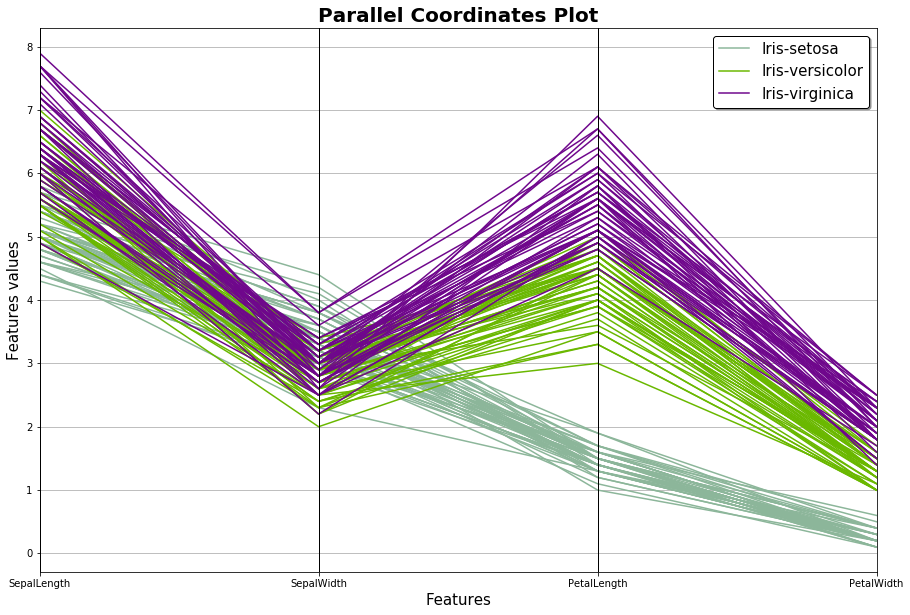

In [3]:
# Data Visualization:
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### Train the model

In [4]:
# Splitting into training and test datasets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Test the model

In [5]:
# Making predictions with the test data (This line is also where we would potentially classify new data)
Y_pred = knn_classifier.predict(X_test)
print(Y_pred)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')
cm = confusion_matrix(Y_test, Y_pred)
cm

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]
Accuracy of model: 94.67 %.


array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]])

### Try out different k values

NameError: name 'k_list' is not defined

<Figure size 432x288 with 0 Axes>

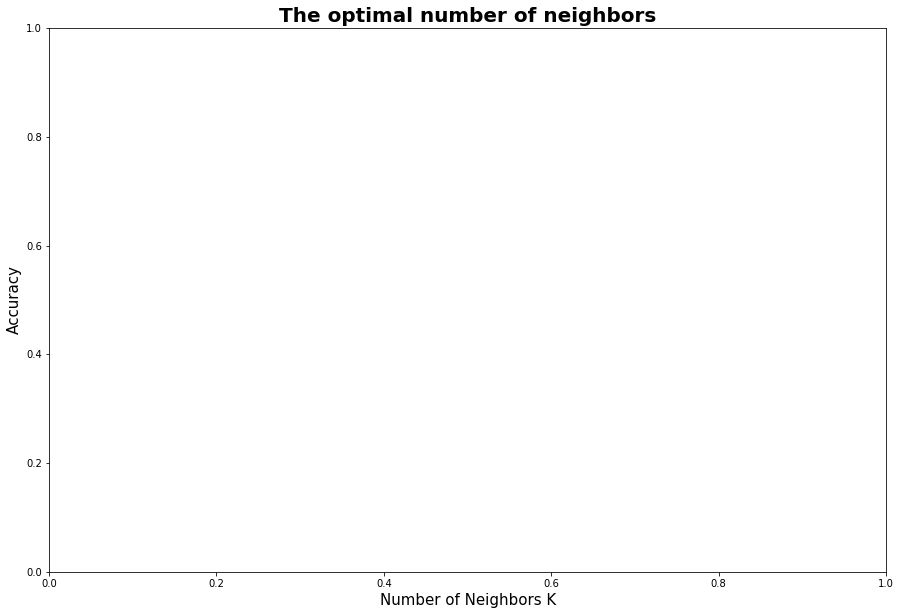

In [6]:
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(k_list, cv_scores)

plt.show()

## Making an API for our model

In [13]:
# Set up Flask App
app = Flask(__name__)

@app.route("/", methods = ['GET'])
def classify():
    # array mapping numbers to flower names
    classes = [ "Iris Setosa", "Iris Versicolor", "Iris Virginica"]
    
    # get values for each component, return error message if not a float
    try:
        values = [[float(request.args.get(component)) for component in ["sHeight", "sWidth", "pHeight", "pWidth"]]]
    except TypeError:
        return "An error occured\nUsage: 127.0.0.1:5000?sHeight=NUM&sWidth=NUM&pHeight=NUM&sHeight=NUM"
    
    # Otherwise, return the prediction.
    prediction = knn_classifier.predict(values)[0]
    return classes[prediction]

# Run the app.
app.run()

# try 127.0.0.1:5000?sHeight=5.2&sWidth=4.6&pHeight=4.2&pWidth=7.8

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
